In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import numpy as np

## Datas importation

In [6]:
df = pd.read_csv('./data/1h/ETH-USDT.csv')
df = df.set_index(df['date'])
df.index = pd.to_datetime(df.index, unit='ms')
del df['date']
del df['high']
del df['low']
del df['open']
del df['volume']
df = df.iloc[300*24:,:]
df.head()

,close
date,
2020-10-27 12:00:00,403.71
2020-10-27 13:00:00,403.18
2020-10-27 14:00:00,403.05
2020-10-27 15:00:00,405.96
2020-10-27 16:00:00,409.56


## indicators calcul

In [7]:
import pandas_ta as pda
import ta

(14954, 3)


384.73

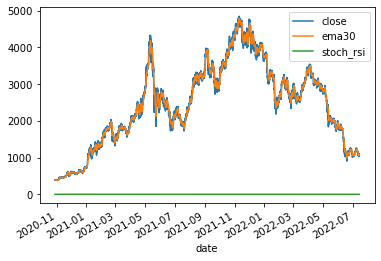

In [8]:
df['ema30']=ta.trend.ema_indicator(close=df['close'], window=30)
df['stoch_rsi'] = ta.momentum.stochrsi(close=df['close'], window=14)
df.dropna(axis=0, inplace=True)
print(df.shape)
df.plot()
row = [list(df.iloc[0:7,:]['close']), list(df.iloc[0:7,:]['ema30']), list(df.iloc[0:7,:]['stoch_rsi'])]
list(df.iloc[0:7,:]['close'])[0]

## Set Parameters

In [9]:
candelSize = 7
Params = [ ]
for i in range(len(list(df['close']))-7):
    i+=6
    row=[]
    row.append(list(df['close'])[i+1])
    row.append(list(df['ema30'])[i+1])
    row.append(list(df['stoch_rsi'])[i+1])
    for j in range(candelSize):
        row.append(list(df['close'])[i-j])
        row.append(list(df['ema30'])[i-j])
        row.append(list(df['stoch_rsi'])[i-j])

    Params.append(row) # close+1 ema30+1 stoch_rsi+1, close ema30 stoch_rsi, close-1 ema30-1 stoch_rsi-1..., close-6 ema30-6
Params = np.array(Params)
Params.shape

Paramdf = pd.DataFrame(Params, columns = ['close +1','ema30 +1','stoch_rsi +1', 'close','ema30','stoch_rsi', 'close -1','ema30 -1','stoch_rsi -1', 'close -2','ema30 -2','stoch_rsi -2','close -3','ema30 -3','stoch_rsi -3','close -4','ema30 -4','stoch_rsi -4','close -5','ema30 -5','stoch_rsi -5','close -6','ema30 -6','stoch_rsi -6',])

Paramdf

,close +1,ema30 +1,stoch_rsi +1,close,ema30,stoch_rsi,close -1,ema30 -1,stoch_rsi -1,close -2,...,stoch_rsi -3,close -4,ema30 -4,stoch_rsi -4,close -5,ema30 -5,stoch_rsi -5,close -6,ema30 -6,stoch_rsi -6
0,388.17,392.958401,0.993933,388.23,393.288636,1.000000,387.56,393.637507,1.000000,386.26,...,0.992659,384.69,395.233955,0.404068,386.25,395.961125,0.373742,384.73,396.630857,0.201372
1,391.35,392.854633,1.000000,388.17,392.958401,0.993933,388.23,393.288636,1.000000,387.56,...,1.000000,385.32,394.594345,0.992659,384.69,395.233955,0.404068,386.25,395.961125,0.373742
2,390.69,392.714980,0.933275,391.35,392.854633,1.000000,388.17,392.958401,0.993933,388.23,...,1.000000,386.26,394.056646,1.000000,385.32,394.594345,0.992659,384.69,395.233955,0.404068
3,391.98,392.667562,1.000000,390.69,392.714980,0.933275,391.35,392.854633,1.000000,388.17,...,1.000000,387.56,393.637507,1.000000,386.26,394.056646,1.000000,385.32,394.594345,0.992659
4,390.46,392.525138,0.843871,391.98,392.667562,1.000000,390.69,392.714980,0.933275,391.35,...,0.993933,388.23,393.288636,1.000000,387.56,393.637507,1.000000,386.26,394.056646,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14942,1084.61,1088.511192,0.000000,1097.58,1088.780239,0.148021,1102.26,1088.173359,0.382708,1106.15,...,0.691104,1112.71,1084.508554,0.925182,1112.20,1082.563627,0.943448,1113.41,1080.519739,0.975780
14943,1089.04,1088.545308,0.139298,1084.61,1088.511192,0.000000,1097.58,1088.780239,0.148021,1102.26,...,0.579650,1106.00,1085.895099,0.691104,1112.71,1084.508554,0.925182,1112.20,1082.563627,0.943448
14944,1087.26,1088.462385,0.082882,1089.04,1088.545308,0.139298,1084.61,1088.511192,0.000000,1097.58,...,0.382708,1106.15,1087.201867,0.579650,1106.00,1085.895099,0.691104,1112.71,1084.508554,0.925182
14945,1081.27,1087.998360,0.000000,1087.26,1088.462385,0.082882,1089.04,1088.545308,0.139298,1084.61,...,0.148021,1102.26,1088.173359,0.382708,1106.15,1087.201867,0.579650,1106.00,1085.895099,0.691104


In [10]:
y = Params[:,0].reshape(Params.shape[0], 1)
X = Params[:, 3:]
y.shape, X.shape

((14947, 1), (14947, 21))

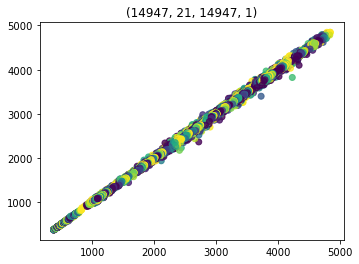

In [11]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.title(str(X.shape + y.shape))
plt.scatter(X[:,0], y[:,0], c=X[:,2], alpha=0.8)
# plt.subplot(122)
# plt.title('Test')
# plt.scatter(Xtest[:,0], Xtest[:,1], c=ytest, alpha=0.8)

## Split Train, test

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
test_size=0.2

Xtrain = X[:int(X.shape[0]*(1-test_size)), :]

ytrain = y[:int(y.shape[0]*(1-test_size)), :]

Xtest = X[int(X.shape[0]*(1-test_size)):, :]

ytest = y[int(y.shape[0]*(1-test_size)):, :]

Params.shape, '| train', Xtrain.shape, ytrain.shape, '| test', Xtest.shape, ytest.shape

((14947, 24),
 '| train',
 (11957, 21),
 (11957, 1),
 '| test',
 (2990, 21),
 (2990, 1))

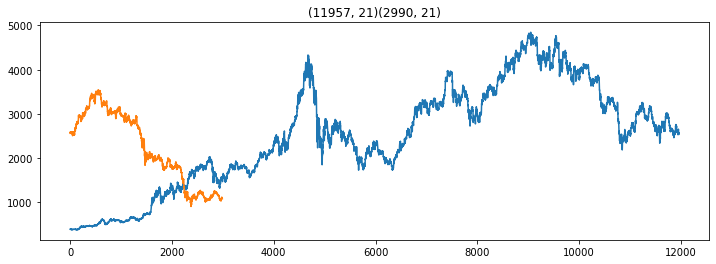

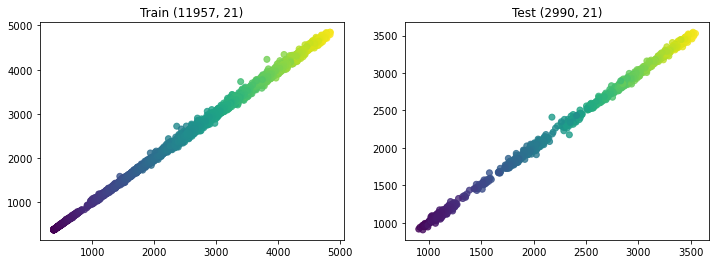

In [14]:
plt.figure(figsize=(12,4))
plt.title(str(Xtrain.shape) + str(Xtest.shape))
plt.plot(Xtrain[:,0])
plt.plot(Xtest[:,0])
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.title('Train ' + str(Xtrain.shape))
plt.scatter(Xtrain[:,0], Xtrain[:,3], c=ytrain, alpha=0.8)
plt.subplot(122)
plt.title('Test ' + str(Xtest.shape))
plt.scatter(Xtest[:,0], Xtest[:,3], c=ytest, alpha=0.8)

## Best model

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, learning_curve, validation_curve
from sklearn.metrics import *

In [16]:
model = LinearRegression()

k = np.arange(1, 2, 1)
param_grid = {'fit_intercept':['True', 'False'], 'copy_X':['True', 'False'], 'positive':['True', 'False'], 'n_jobs':k}
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(Xtrain, ytrain)

model = grid.best_estimator_
print(grid.best_estimator_)
print(grid.best_score_)

LinearRegression(copy_X='True', fit_intercept='True', n_jobs=1, positive='True')
0.9971348307506969


## validation_curve

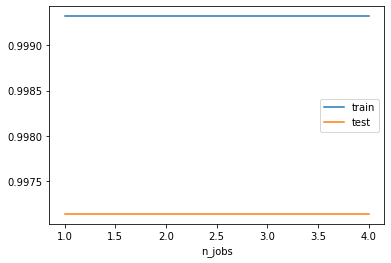

In [18]:
k = np.arange(0, 5, 1)
trainScore, valScore = validation_curve(model, Xtrain, ytrain, param_name='n_jobs', param_range=k, cv=5)
plt.plot(k, trainScore.mean(axis=1), label='train')
plt.plot(k, valScore.mean(axis=1), label='test')
plt.xlabel('n_jobs')
plt.legend()

## learning_curve

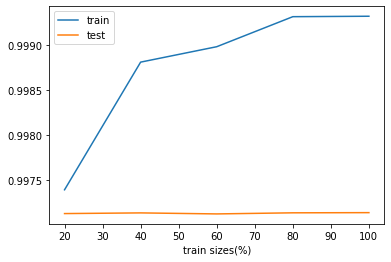

In [19]:
N, trainScore, valScore = learning_curve(model, Xtrain, ytrain, train_sizes=np.linspace(0.2, 1.0, 5))
N = np.apply_along_axis(lambda x: x/np.max(N)*100, 0, N)

plt.plot(N, trainScore.mean(axis=1), label='train')
plt.plot(N, valScore.mean(axis=1), label='test')
plt.xlabel('train sizes(%)')
plt.legend()

## Errors

In [20]:
model.fit(Xtrain,ytrain)
xPred = model.predict(Xtest)
print(ytest.shape, xPred.shape)

print()
print(f"MAE : {mean_absolute_error(ytest, xPred)}/{np.median(ytest, axis=0)[0]} ({round(mean_absolute_error(ytest, xPred)/np.median(ytest, axis=0)[0]*100, 2)}%)")
print(f"SMSE : {np.sqrt(mean_squared_error(ytest, xPred))}/{np.median(ytest, axis=0)[0]} ({round(np.sqrt(mean_squared_error(ytest, xPred))/np.median(ytest, axis=0)[0]*100, 2)}%)")
print('Score :', model.score(Xtest,ytest))

(2990, 1) (2990, 1)

MAE : 12.792357143882864/2082.7250000000004 (0.61%)
SMSE : 19.074751693515974/2082.7250000000004 (0.92%)
Score : 0.9994447333628405


In [21]:
(ytest-xPred).mean()

-0.924473307028239

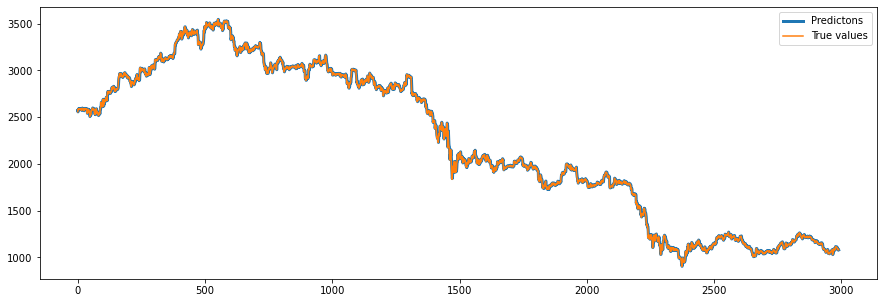

In [22]:
plt.figure(figsize=(15,5))
plt.plot(xPred, lw=3, label='Predictons')
plt.plot(ytest, label='True values')
plt.legend()

## Prediction

In [23]:
from binance.client import Client

In [24]:
client = Client()
pair_symbol = "ETHUSDT"
time_interval = Client.KLINE_INTERVAL_1DAY
start_date = "06-01-2022"

,close,ema30,stoch_rsi
timestamp,,,
2022-06-30,1071.01,1328.688584,0.698680
2022-07-01,1059.73,1311.336417,0.679907
2022-07-02,1067.01,1295.573422,0.511873
2022-07-03,1074.26,1281.295137,0.561652
2022-07-04,1151.00,1272.888999,1.000000
2022-07-05,1132.50,1263.831644,0.928688
2022-07-06,1186.57,1258.847022,1.000000
2022-07-07,1237.49,1257.469150,1.000000
2022-07-08,1214.04,1254.667269,0.894362


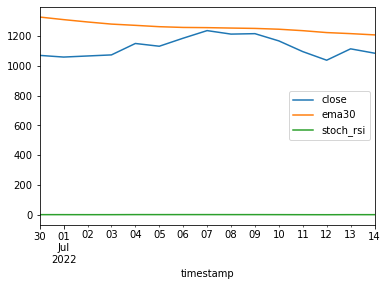

In [25]:
klinesT = client.get_historical_klines(pair_symbol, time_interval, start_date)
dfs = pd.DataFrame(klinesT, columns = ['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_av', 'trades', 'tb_base_av', 'tb_quote_av', 'ignore' ])
dfs.drop(columns = dfs.columns.difference(['timestamp','open','high','low','close','volume']), inplace=True)

for col in dfs.columns:
    dfs[col] = pd.to_numeric(dfs[col])

# Convertit les dates dans un format lisible
dfs = dfs.set_index(dfs['timestamp'])
dfs.index = pd.to_datetime(dfs.index, unit='ms')
del dfs['timestamp']
del dfs['high']
del dfs['low']
del dfs['open']
del dfs['volume']

dfs['ema30']=ta.trend.ema_indicator(close=dfs['close'], window=30)
dfs['stoch_rsi'] = ta.momentum.stochrsi(close=dfs['close'], window=14)
dfs.dropna(axis=0, inplace=True)
dfs = pd.DataFrame(dfs, columns = ['close', 'ema30', 'stoch_rsi'])
dfs.plot()
dfs

In [26]:
dfs[:].iloc[0:7]

,close,ema30,stoch_rsi
timestamp,,,
2022-06-30,1071.01,1328.688584,0.698680
2022-07-01,1059.73,1311.336417,0.679907
2022-07-02,1067.01,1295.573422,0.511873
2022-07-03,1074.26,1281.295137,0.561652
2022-07-04,1151.00,1272.888999,1.000000
2022-07-05,1132.50,1263.831644,0.928688
2022-07-06,1186.57,1258.847022,1.000000


In [27]:
candelSize = 7
Params = [ ]

for j in range(candelSize):
    j += candelSize-1
    Params.append(list(dfs['close'])[-1-j])
    Params.append(list(dfs['ema30'])[-1-j])
    Params.append(list(dfs['stoch_rsi'])[-1-j])

# Params = np.array(Params)
Params = [Params]
Paramdf = pd.DataFrame(Params, columns = ['close','ema30','stoch_rsi', 'close -1','ema30 -1','stoch_rsi -1', 'close -2','ema30 -2','stoch_rsi -2','close -3','ema30 -3','stoch_rsi -3','close -4','ema30 -4','stoch_rsi -4','close -5','ema30 -5','stoch_rsi -5','close -6','ema30 -6','stoch_rsi -6'])
Paramdf

,close,ema30,stoch_rsi,close -1,ema30 -1,stoch_rsi -1,close -2,ema30 -2,stoch_rsi -2,close -3,...,stoch_rsi -3,close -4,ema30 -4,stoch_rsi -4,close -5,ema30 -5,stoch_rsi -5,close -6,ema30 -6,stoch_rsi -6
0,1214.04,1254.667269,0.894362,1237.49,1257.46915,1.0,1186.57,1258.847022,1.0,1132.5,...,0.928688,1151.0,1272.888999,1.0,1074.26,1281.295137,0.561652,1067.01,1295.573422,0.511873


In [28]:
Xpredict = np.array(Paramdf)

In [29]:
prediction = round(model.predict(Xpredict)[0][0], 2)
print('Prediction :')
print('next close :', prediction)
print('next close(%) :', round((prediction-Xpredict[0][0])/Xpredict[0][0]*100,2))

Prediction :
next close : 1213.19
next close(%) : -0.07


In [30]:
dfs2 = pd.DataFrame(dfs, columns = ['close', 'ema30', 'stoch_rsi'])
dfs=dfs.reset_index()
dfs3 = pd.DataFrame([[prediction, 0, 0]], columns = ['close', 'ema30', 'stoch_rsi'])
dfs2 = dfs2.append(dfs3, ignore_index = True)

C:\Users\Ewan Frénel\AppData\Local\Temp\ipykernel_10632\1121746898.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfs2 = dfs2.append(dfs3, ignore_index = True)


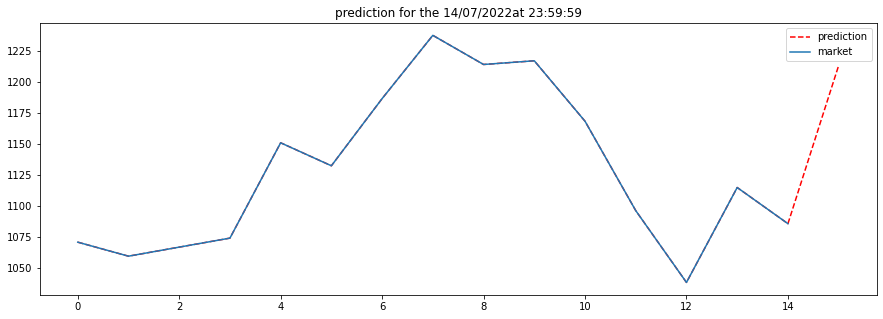

In [31]:
from datetime import date

plt.figure(figsize=(15,5))
plt.title('close, ema30')
plt.plot(dfs2['close'], label='prediction', c='r', ls='--')
plt.plot(dfs['close'], label='market')
plt.title('prediction for the ' + date.today().strftime("%d/%m/%Y") + 'at 23:59:59')
plt.legend()
plt.savefig('predict_graph/'+date.today().strftime("%d-%m-%Y"))